## Objective - Create a ML system that detects and classifies hand-written digits

#### Import modules and prepare dataset

In [6]:
# Import sklearn modules.
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Import other modules.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import pygame
from tkinter import *
from time import time
from plyer import notification

# NOTE: To import 'plyer' module, you must use 'pip install plyer'

# Getting workspace/project to create a path that leads to the dataset.
print(os.getcwd())

# Import dataset.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# NOTE: You can download these files @: https://www.kaggle.com/oddrationale/mnist-in-csv?select=mnist_train.csv

# X is the hand written digits, y is the actual digits (answers).
X_train, y_train = (train.loc[:, '1x1':'28x28'].to_numpy(), train['label'].to_numpy())
X_test, y_test = (test.loc[:, '1x1':'28x28'].to_numpy(), test['label'].to_numpy())

# X represents the hand written digits which are 28 x 28 in size.
print(f'X_train.shape: {X_train.shape}')    # -> (60,000, 784)

# Y is the actual digits they represent.
print(f'y_train.shape: {y_train.shape}')    # -> (60,000,)

print(f'X_test.shape: {X_test.shape}')    # -> (10,000, 784)
print(f'y_test.shape: {y_test.shape}')    # -> (10,000,)

c:\Users\rohan\Documents\Software Development\AI\Projects\AI Predicts Hand-Written Digits
X_train.shape: (60000, 784)
y_train.shape: (60000,)
X_test.shape: (10000, 784)
y_test.shape: (10000,)


#### Visualize the data using TSNE dimensionality technique

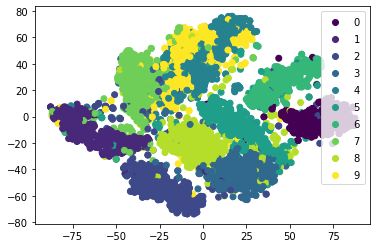

In [3]:
tsne = TSNE()

X_test_trans = tsne.fit_transform(X_test[:5000])

scatter = plt.scatter(X_test_trans[:, 0], X_test_trans[:, 1], c=y_test[:5000])
plt.legend(*scatter.legend_elements())
plt.show()

# Data is formed in clusters and looks to be linearly seperable.


#### Data Analysis

(784,)
0.8087977040816327
0.19120229591836735
False
174.40802874718895
X_train.shape: (60000, 784)
X_test.shape: (10000, 784)


Text(0.5, 1.0, 'After reform_data()')

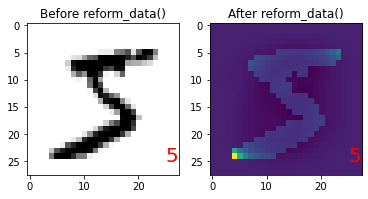

In [7]:
data = np.concatenate((X_train, X_test))
target = np.concatenate((y_train, y_test))

# NOTE: The amount of features (784) will take lots of computational power.

print(data[0].shape)    # -> (784,)

# Check % of data that's 0.
print(np.sum(X_train == 0)/X_train.size)    # -> 80%
print(np.sum(X_train != 0)/X_train.size)    # -> 20%

# Check for null values.
print(np.isnan(np.sum(data)))    # -> False

# Change the data so that every value is the same (0 or ___).
all_values = []

for sub_arr in data:
    for i in sub_arr:
        if i != 0:
            all_values.append(i)

print(average_val := sum(all_values)/len(all_values))    # -> 174.4

# Create scaler.
scaler = StandardScaler()


# Reform the data according to value.
def reform_data(arr, scale=None):
    new_arr = []
    for sub_arr in arr:
        new_arr.append([])
        index = new_arr.index([])    # Finds index of new row/sample.
        for i in sub_arr:
            if i != 0:
                new_arr[index].append(average_val)
            else:
                new_arr[index].append(0)

    return np.array(new_arr) if scale is None else scale(np.array(new_arr))


# Reform the data.
X_train = reform_data(X_train, scaler.fit_transform)
X_test = reform_data(X_test, scaler.transform)

print(f'X_train.shape: {X_train.shape}')    # -> (60000, 784)
print(f'X_test.shape: {X_test.shape}')    # -> (10000, 784)

# Check how X_train sample is now different.
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(data[0].reshape((28, 28)), cmap='binary')
ax1.text(25, 25, target[0], fontsize=20, color='red')
ax1.set_title('Before reform_data()')

ax2.imshow(X_train[0].reshape((28, 28)), cmap='binary')
ax2.text(25, 25, target[0], fontsize=20, color='red')
ax2.set_title('After reform_data()')

#### Apply Linear Model to the Data

In [8]:
lin_clf = Perceptron()    # Perceptron only works when data is linear.

# NOTE: SVDs are good for dimensionality reduction when data has a lot of zeros.

lin_clf.fit(X_train, y_train)

print(lin_clf.score(X_train, y_train))
print(lin_clf.score(X_test, y_test))

0.8878833333333334
0.8789


#### Apply Model to the Data

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.8s remaining:   38.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   26.1s remaining:   17.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.3s finished
Train Score: 0.9805357142857144
Test Score: 0.9501428571428571


Pipeline(steps=[('svd', TruncatedSVD(n_components=149)), ('svm', SVC())])

#### Check how SVD affected the data

In [11]:
mlp_clf = MLPClassifier(    # MLP stands for multi-layer perceptron.
    random_state=42,
    hidden_layer_sizes=(200,),
    alpha=1
)

start_time = time()

mlp_clf.fit(X_train, y_train)

end_time = (time() - start_time)/60

print('MLP Train Score: {}'.format(train_score := mlp_clf.score(X_train, y_train)))
print('MLP Test Score: {}'.format(test_score := mlp_clf.score(X_test, y_test)))

# Notify when done.
notification.notify(
    title='Neural Network Training Results',
    message=f'Elapsed: {end_time:.2f} min.'
            f'\nTrain Score: {train_score*100:.2f}'
            f'\nTest Score: {test_score*100:.2f}',
    timeout=50,
    app_icon='python_icon.ico'
)

MLP Train Score: 0.9763
MLP Test Score: 0.9663


#### Visualize the Results

(1797, 64)
(1797, 8, 8)


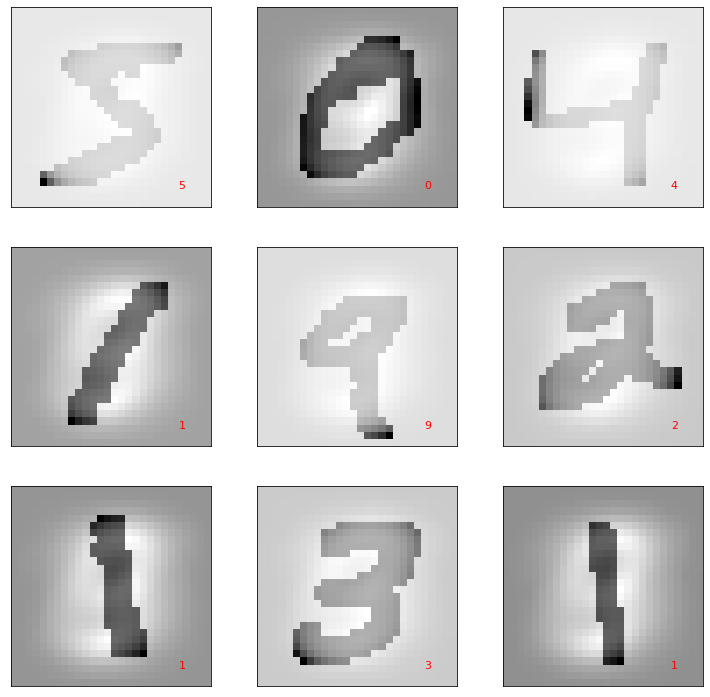

In [12]:
# Checking how digits dataset displays images.
dig_data = load_digits().data
dig_img = load_digits().images

print(dig_data.shape)
print(dig_img.shape)

# NOTE: Found out that images variable is 3 dimensional!

# Making data 3D so that imshow() can read data correctly as an img.

# NOTE: The reshaping of the array is to make the sample the shape of a sample.

'''

Ex: reshape(1, -1)

returns a np array with a column of 784 data points.

'''

fig, axs = plt.subplots(3, 3, subplot_kw={'yticks': (), 'xticks': ()}, figsize=(12.5, 12.5))

predictions = mlp_clf.predict(X_train[:9])
axs = [ax for ax in axs.ravel()]
data_imgs = X_train[:9].reshape(9, 28, 28)

for ax, prediction, img in zip(axs, predictions, data_imgs):
    ax.imshow(img, cmap='binary')
    ax.text(23, 25, prediction, fontsize=11, color='red')

plt.show()

#### Create your own samples


In [13]:
# Create user plot mechanism using pygame.
class Pixel(object):
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width1 = width
        self.width = self.width1
        self.height = height
        self.color = (255, 255, 255)
        self.neighbors = []

    def draw(self, surface):
        pygame.draw.rect(surface, self.color, (self.x, self.y, self.x + self.width, self.y + self.height))

    def get_neighbor(self, g):
        # Get the neighbors of each pixel in the grid to create thicker lines.
        j = self.x // 20
        i = self.y // 20
        rows = 28
        cols = 28

        if i < cols - 1:  # Right
            self.neighbors.append(g.pixels[i + 1][j])
        if i > 0:  # Left
            self.neighbors.append(g.pixels[i - 1][j])
        if j < rows - 1:  # Up
            self.neighbors.append(g.pixels[i][j + 1])
        if j > 0:  # Down
            self.neighbors.append(g.pixels[i][j - 1])

        # Diagonal neighbors
        if j > 0 and i > 0:  # Top Left
            self.neighbors.append(g.pixels[i - 1][j - 1])

        if j + 1 < rows and i > -1 and i - 1 > 0:  # Bottom Left
            self.neighbors.append(g.pixels[i - 1][j + 1])

        if rows > j - 1 > 0 and i < cols - 1:  # Top Right
            self.neighbors.append(g.pixels[i + 1][j - 1])

        if j < rows - 1 and i < cols - 1:  # Bottom Right
            self.neighbors.append(g.pixels[i + 1][j + 1])


class Grid(object):
    pixels = []

    def __init__(self, row, col, width, height):
        self.rows = row
        self.cols = col
        self.len = row * col
        self.width = width
        self.height = height
        self.generate_pixels()
        pass

    def draw(self, surface):
        for row in self.pixels:
            for col in row:
                col.draw(surface)

    def generate_pixels(self):
        x_gap = self.width // self.cols
        y_gap = self.height // self.rows
        self.pixels = []
        for r in range(self.rows):
            self.pixels.append([])
            for c in range(self.cols):
                self.pixels[r].append(Pixel(x_gap * c, y_gap * r, x_gap, y_gap))

        for r in range(self.rows):
            for c in range(self.cols):
                self.pixels[r][c].get_neighbor(self)

    def clicked(self, pos):    # Return the position in the grid that user clicked on
        try:
            t = pos[0]
            w = pos[1]
            g1 = int(t) // self.pixels[0][0].width
            g1 = int(t) // self.pixels[0][0].width
            g2 = int(w) // self.pixels[0][0].height

            return self.pixels[g2][g1]
        except:
            pass

    def convert_binary(self):
        li = self.pixels

        new_matrix = [[] for x in range(len(li))]

        for i in range(len(li)):
            for j in range(len(li[i])):
                if li[i][j].color == (255, 255, 255):
                    new_matrix[i].append(0)
                else:
                    new_matrix[i].append(average_val)

        return reform_data(np.array(new_matrix).reshape(1, -1), scaler.transform)


def guess(li):
    print("I predict this number is a:", mlp_clf.predict(li)[0])
    window = Tk()
    window.withdraw()
    window.destroy()


def main():
    run = True

    while run:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False
            if event.type == pygame.KEYDOWN:
                li = g.convert_binary()
                guess(li)
                g.generate_pixels()
            if pygame.mouse.get_pressed()[0]:

                pos = pygame.mouse.get_pos()
                clicked = g.clicked(pos)
                clicked.color = (0, 0, 0)
                for n in clicked.neighbors:
                    n.color = (0, 0, 0)

            if pygame.mouse.get_pressed()[2]:
                try:
                    pos = pygame.mouse.get_pos()
                    clicked = g.clicked(pos)
                    clicked.color = (255, 255, 255)
                except:
                    pass

        g.draw(win)
        pygame.display.update()


pygame.init()
width = height = 560
win = pygame.display.set_mode((width, height))
pygame.display.set_caption("Number Guesser")
g = Grid(28, 28, width, height)
main()


pygame.quit()
quit()


I predict this number is a: 2
I predict this number is a: 2
I predict this number is a: 3
I predict this number is a: 4
I predict this number is a: 2
I predict this number is a: 3
I predict this number is a: 5
I predict this number is a: 7
I predict this number is a: 8
I predict this number is a: 3
I predict this number is a: 9
I predict this number is a: 0
I predict this number is a: 1
I predict this number is a: 7
I predict this number is a: 3
I predict this number is a: 7
I predict this number is a: 3
I predict this number is a: 6
I predict this number is a: 3
I predict this number is a: 6
I predict this number is a: 2
I predict this number is a: 5
